<a href="https://colab.research.google.com/github/vision953/Personality-Prediction-mini/blob/main/Personality_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Personality Prediction Project**
---

# **Introduction**
In this project, I try to optimize a supervised machine learning algorithm to predict Myers-Briggs personality profiles of Kaggle forum users based on the **MBTI** (Myers-Briggs Personality Type) Dataset on Kaggle.

Dataset link: https://www.kaggle.com/datasnaek/mbti-type

---


The Myers Briggs Type Indicator (or **MBTI** for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:


**1) Introversion (I) – Extroversion (E)**  :  a measure of how much an individual prefers their outer or inner world.

**2) Intuition (N) – Sensing (S)**  :  a measure of how much an individual processes information through the five senses versus impressions through patterns

**3) Thinking (T) – Feeling (F)**  :  a measure of preference for objective principles and facts versus weighing the emotional perspectives of others.

**4) Judging (J) – Perceiving (P)**  :  a measure of how much an individual prefers a planned and ordered life versus a flexible and spontaneous life.

---

# **Data Preparation & Cleaning**

### Downloading datasets

We'll use the `opendatasets` helper library to download the files

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasnaek/mbti-type')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sailesh307
Your Kaggle Key: ··········


100%|██████████| 24.4M/24.4M [00:00<00:00, 150MB/s] 

In [ ]:
od.download('https://www.kaggle.com/kaggle/meta-kaggle')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sailesh307
Your Kaggle Key: ··········


  0%|          | 5.00M/1.65G [00:00<00:53, 32.8MB/s]

100%|██████████| 1.65G/1.65G [00:10<00:00, 167MB/s]


Now all datasets are successfully Downloaded

==================================================================================================

### importing all required libraries



In [ ]:
import re
from time import time
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer

Let's verify that the dataset was downloaded into the directory `mbti-type`,`meta-kaggle` and  retrieve the list of files in the dataset

In [ ]:
import os

In [ ]:
print('mbti-type : ',os.listdir('mbti-type'))
print('meta-kaggle : ',os.listdir('meta-kaggle'))

mbti-type :  ['mbti_1.csv']
meta-kaggle :  ['KernelVersionDatasetSources.csv', 'Organizations.csv', 'Tags.csv', 'Forums.csv', 'KernelLanguages.csv', 'Datasources.csv', 'Competitions.csv', 'Kernels.csv', 'CompetitionTags.csv', 'KernelVersions.csv', 'KernelVersionCompetitionSources.csv', 'Teams.csv', 'DatasetVotes.csv', 'UserOrganizations.csv', 'KernelVersionKernelSources.csv', 'UserAchievements.csv', 'ForumTopics.csv', 'DatasetVersions.csv', 'KernelVotes.csv', 'ForumMessageVotes.csv', 'DatasetTags.csv', 'Datasets.csv', 'TeamMemberships.csv', 'KernelTags.csv', 'Submissions.csv', 'Users.csv', 'UserFollowers.csv', 'ForumMessages.csv', 'KernelVersionOutputFiles.csv']


In [ ]:
len(os.listdir('meta-kaggle'))

29

It seems like the `mbti-type` dataset contains 1 file:

- `mbti_1.csv` - the full list of posts

and `meta-kaggle` dataset contains 29 file

We will load the CSV file using the Pandas library

We'll use following variables:-

- `train_data` for the data frame `mbti_1.csv`
- `forum_data` for `ForumMessages.csv`

to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.



In [ ]:
train_data = pd.read_csv('mbti-type/mbti_1.csv')
forum_data = pd.read_csv('meta-kaggle/ForumMessages.csv')
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}

### Let's view all datasets

In [ ]:
train_data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
forum_data

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,51355,9844,114673,07/30/2014 13:46:14,NaN,"<p>Hi Navin,</p>\n<p>Thanks for the great ques...",3.0,07/15/2016
1,51359,9844,196027,07/30/2014 14:20:27,NaN,<p>Hi Brinkmann</p>\n<p>Thanks for the mail an...,NaN,NaN
2,125519,21969,266055,06/30/2016 04:32:34,NaN,"<p>Hi,</p>\n\n<p>Does anyone know where I can ...",NaN,NaN
3,51353,827,16557,07/30/2014 13:21:05,NaN,<p>Hi!</p>\n<p>I have tried to download the zi...,NaN,NaN
4,103443,18221,116365,01/02/2016 23:02:51,NaN,"<p>Hi Alchemist, this is what I was wondering...",NaN,NaN
...,...,...,...,...,...,...,...,...
915996,1063996,193914,4347897,10/29/2020 15:22:45,NaN,"<p>Hello,<br>\nIt looks like some of the songs...",NaN,NaN
915997,1065807,194277,4775928,10/31/2020 19:29:27,NaN,<p>How am I supposed to import this dataset in...,NaN,NaN
915998,1064169,193944,5797807,10/29/2020 19:49:35,NaN,"<p>Hi Mohaiminul,</p>\n<p>Your data descriptio...",NaN,NaN
915999,1063472,193810,3635663,10/29/2020 00:51:56,NaN,<p>Se invita a que puedan presentar sus ideas ...,NaN,NaN


### Let's view some info about our trainning dataset

Let's look at the structure of the dataset.

In [ ]:
train_data.shape

(8675, 2)

Let's look at the distribution of personality profile types in the `training data.`

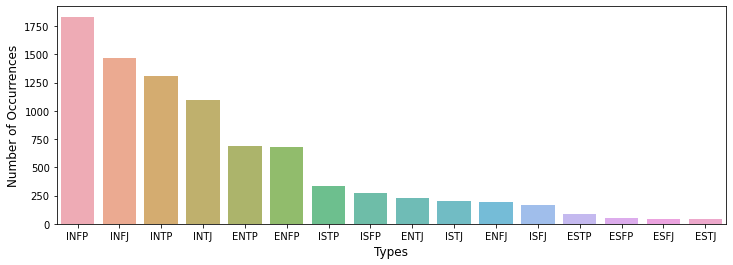

In [ ]:
type_count = train_data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(x=type_count.index, y=type_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

The personality types seems to be heavily skewed to the right.

### Handle missing values

Let's see if there are missing values in our data.

In [ ]:
print('Forum Missing Values:')
print(forum_data.isnull().sum())

Forum Missing Values:
Id                            0
ForumTopicId                  0
PostUserId                    0
PostDate                      0
ReplyToForumMessageId    598273
Message                    7273
Medal                    570319
MedalAwardDate           570326
dtype: int64


In [ ]:
print('Training Missing Values:')
print(train_data.isnull().sum())

Training Missing Values:
type     0
posts    0
dtype: int64


Fill missing values for `forum_data['Message']` with blank space.

In [ ]:
forum_data['Message'] = forum_data['Message'].fillna('')

print('Forum Missing Values:')
print(forum_data.isnull().sum())

Forum Missing Values:
Id                            0
ForumTopicId                  0
PostUserId                    0
PostDate                      0
ReplyToForumMessageId    598273
Message                       0
Medal                    570319
MedalAwardDate           570326
dtype: int64


In [ ]:
print(forum_data['PostUserId'].value_counts())

3012786    8439
75976      7959
1723677    5207
113660     3463
3258       2389
           ... 
4172508       1
5225182       1
3328684       1
1464178       1
40980         1
Name: PostUserId, Length: 154205, dtype: int64


Since a given user might have posted more than once on Kaggle forums, I will group all `'Message'` together for each unique user.

In [ ]:
forum_data_agg = forum_data.groupby('PostUserId')['Message'].agg(lambda col: ' '.join(col)).reset_index()

In [ ]:
print(forum_data_agg['PostUserId'].value_counts())

2688042    1
4995221    1
5463233    1
306367     1
4817911    1
          ..
4581213    1
2378332    1
5573079    1
25177      1
1572864    1
Name: PostUserId, Length: 154205, dtype: int64


### Cleaning data

First, I'll clean the text from the training data posts as well as the Kaggle forum data posts.

In [ ]:
#function to clean data
def clean_text(text):
    #get rid of html and seperators
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r'  ', text) 
    text = re.sub(r'http\S+', r'  ', text)
    #get rid of punctuation
    text = text.replace('.', '  ')
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    #get rid of numbers
    text = ''.join(i for i in text if not i.isdigit())
    return text

In [ ]:
train_data['clean_posts'] = train_data['posts'].apply(clean_text)

In [ ]:
train_data['clean_posts'][1]

'Im finding the lack of me in these posts very alarming    Sex can be boring if its in the same position often   For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary   There isnt enough        Giving new meaning to Game theory    Hello ENTP Grin  Thats all it takes   Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins    This  Lack of Balance and Hand Eye Coordination    Real IQ test I score    Internet IQ tests are funny   I score s or higher    Now like the former responses of this thread I will mention that I dont believe in the IQ test   Before you banish        You know youre an ENTP when you vanish from a site for a year and a half return and find people are still commenting on your posts and liking your ideasthoughts   You know youre an ENTP when you                I over think things sometimes   I go by the old She

In [ ]:
forum_data_agg['clean_messages'] = forum_data_agg['Message'].apply(clean_text)

In [ ]:
forum_data_agg['clean_messages'][1]

'The public leaderboard is only indicative because competitors can use information on their score to get information on a portion of the test dataset   The final results are a quite different and b better reflect actual performance   Hi Tanya Kaggle will maintain a rating system   If you win but youre ineligible for prize money you will still get a strong rating  Anthony Here are some papers that analyze Eurovision voting patterns   You might find some of them helpful   Gatherer Comparison of Eurovision Song Contest Simulation with Actual Results Reveals Shifting Patterns of Collusive Voting Alliances      Eurovision Song Contest Is Voting Political or Cultural Ginburgh and Noury    Suleman Efstathiou and Johnson    Eurovision Song Contest as a ‘Friendship’ Network\r\nDekker   \n More research       enjoyLove thy Neighbor Love thy Kin Voting Biases in the Eurovision Song Contest   culture and religion Explaining the bias in Eurovision song contest voting   Hybrid System Approach to Det

The training data looks good, but the Kaggle forum messages are almost cleaned except there are certain words that are fused together like `'mindAnthony'` and `'CommunityForum'`. I will need to split those words apart before I stem or else it won't work properly.

In [ ]:
#function to split string by uppercase
def split_uppercase(text):
    text_list = text.split()
    new_list = []
    for i in text_list:
        if i.isupper() == False: #don't split acronyms
            word = re.sub(r'([A-Z])', r' \1', i)
            new_list.append(word)
        else:
            word = i
            new_list.append(word)
    words = ' '.join(new_list)
    return words
            

In [ ]:
forum_data_agg['clean_messages'] = forum_data_agg['clean_messages'].apply(split_uppercase)

In [ ]:
forum_data_agg['clean_messages'][1]

' The public leaderboard is only indicative because competitors can use information on their score to get information on a portion of the test dataset  The final results are a quite different and b better reflect actual performance  Hi  Tanya  Kaggle will maintain a rating system  If you win but youre ineligible for prize money you will still get a strong rating  Anthony  Here are some papers that analyze  Eurovision voting patterns  You might find some of them helpful  Gatherer  Comparison of  Eurovision  Song  Contest  Simulation with  Actual  Results  Reveals  Shifting  Patterns of  Collusive  Voting  Alliances  Eurovision  Song  Contest  Is  Voting  Political or  Cultural  Ginburgh and  Noury  Suleman  Efstathiou and  Johnson  Eurovision  Song  Contest as a ‘ Friendship’  Network  Dekker  More research enjoy Love thy  Neighbor  Love thy  Kin  Voting  Biases in the  Eurovision  Song  Contest culture and religion  Explaining the bias in  Eurovision song contest voting  Hybrid  System

Looks much better. Now that the train posts and forum posts are cleaned, I'll stem them.

In [ ]:
#function to stem words
def stem_text(text):
    stemmer = SnowballStemmer('english')
    words_list = text.split()
    new_list = []
    for i in words_list:
        word = stemmer.stem(i)
        new_list.append(word)
        
    words = new_list
    words = ' '.join(words)
    return words

In [ ]:
train_data['clean_posts'] = train_data['clean_posts'].apply(stem_text)

In [ ]:
train_data['clean_posts'][1]

'im find the lack of me in these post veri alarm sex can be bore if it in the same posit often for exampl me and my girlfriend are current in an environ where we have to creativ use cowgirl and missionari there isnt enough give new mean to game theori hello entp grin that all it take than we convers and they do most of the flirt while i acknowledg their presenc and return their word with smooth wordplay and more cheeki grin this lack of balanc and hand eye coordin real iq test i score internet iq test are funni i score s or higher now like the former respons of this thread i will mention that i dont believ in the iq test befor you banish you know your an entp when you vanish from a site for a year and a half return and find peopl are still comment on your post and like your ideasthought you know your an entp when you i over think thing sometim i go by the old sherlock holm quot perhap when a man has special knowledg and special power like my own it rather encourag him to seek a complex

In [ ]:
forum_data_agg['clean_messages'] = forum_data_agg['clean_messages'].apply(stem_text)

In [ ]:
forum_data_agg['clean_messages'][1]

"the public leaderboard is onli indic becaus competitor can use inform on their score to get inform on a portion of the test dataset the final result are a quit differ and b better reflect actual perform hi tanya kaggl will maintain a rate system if you win but your inelig for prize money you will still get a strong rate anthoni here are some paper that analyz eurovis vote pattern you might find some of them help gather comparison of eurovis song contest simul with actual result reveal shift pattern of collus vote allianc eurovis song contest is vote polit or cultur ginburgh and nouri suleman efstathiou and johnson eurovis song contest as a ‘ friendship network dekker more research enjoy love thi neighbor love thi kin vote bias in the eurovis song contest cultur and religion explain the bias in eurovis song contest vote hybrid system approach to determin the rank of a debut countri in eurovis eurovis judgment versus public opinion – evid from the eurovis song contest giovanni thank for

---

Looks pretty good. Now that all the messages are cleaned and stemmed, I'll build my pipeline and test a few different classifiers.

# **Classifier Building**

### Importing libraries

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

## ExtraTreesClassifier with SVD

In [ ]:
etc = ExtraTreesClassifier(n_estimators = 20, max_depth=4, n_jobs = -1)
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)
model = Pipeline([('tfidf1', tfidf), ('tsvd1', tsvd), ('etc', etc)])

In [ ]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
np.random.seed(1)

results = cross_validate(model, train_data['clean_posts'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_acc']),
                                                  np.std(results['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_f1_micro']),
                                            np.std(results['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results['test_neg_log_loss']),
                                                 np.std(-1*results['test_neg_log_loss'])))

CV Accuracy: 0.3847 (+/- 0.0146)
CV F1: 0.3847 (+/- 0.0146)
CV Logloss: 2.0604 (+/- 0.0151)


As the dataset is very unbalanced F1 score is a better metric than accuracy

## Alternative Modles

Let's try if we can find a more accuracy model, although we haven't got a lot of data

### Naive Bayes

In [ ]:
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)

model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])

results_nb = cross_validate(model_nb, train_data['clean_posts'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_acc']),
                                                  np.std(results_nb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_f1_micro']),
                                            np.std(results_nb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_nb['test_neg_log_loss']),
                                                 np.std(-1*results_nb['test_neg_log_loss'])))

CV Accuracy: 0.5572 (+/- 0.0106)
CV F1: 0.5572 (+/- 0.0106)
CV Logloss: 6.2282 (+/- 0.3234)


### Logistic Regression

In [ ]:
np.random.seed(1)

from sklearn.linear_model import LogisticRegression

tfidf2 = CountVectorizer(ngram_range=(1, 1), stop_words='english', lowercase = True, max_features = 5000)

model_lr = Pipeline([('tfidf1', tfidf2), ('lr', LogisticRegression(class_weight="balanced", C=0.005))])

results_lr = cross_validate(model_lr, train_data['clean_posts'], train_data['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

In [ ]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_acc']),
                                                  np.std(results_lr['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_f1_micro']),
                                            np.std(results_lr['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_lr['test_neg_log_loss']),
                                                 np.std(-1*results_lr['test_neg_log_loss'])))

CV Accuracy: 0.6523 (+/- 0.0096)
CV F1: 0.6523 (+/- 0.0096)
CV Logloss: 1.3079 (+/- 0.0196)


# **Kaggle Users Personality Prediction**
As our Last model `(Logistic Regression)` gives high accuracy so we will apply our last model to whole kaggle users comments.

Let's see what is the most common kaggle user personalities

In [ ]:
model_lr.fit(train_data['clean_posts'], train_data['type'])
pred_all = model_lr.predict(forum_data_agg['clean_messages'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


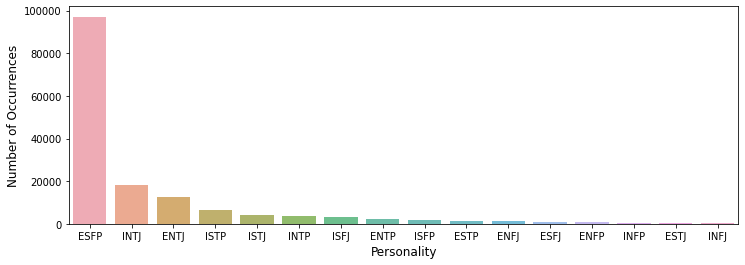

In [ ]:
cnt_all = np.unique(pred_all, return_counts=True)

pred_df = pd.DataFrame({'personality': cnt_all[0], 'count': cnt_all[1]},
                      columns=['personality', 'count'], index=None)

pred_df.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(12,4))
sns.barplot(x=pred_df['personality'], y=pred_df['count'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Personality', fontsize=12)
plt.show()

In [ ]:
pred_df['percent'] = pred_df['count']/pred_df['count'].sum()

In [ ]:
pred_df['description'] = pred_df['personality'].apply(lambda x: ' '.join([mbti[l] for l in list(x)]))

In [ ]:
pred_df

,personality,count,percent,description
5,ESFP,97114,0.629772,Extroversion Sensing Feeling Perceiving
10,INTJ,18151,0.117707,Introversion Intuition Thinking Judging
2,ENTJ,12435,0.080639,Extroversion Intuition Thinking Judging
15,ISTP,6446,0.041801,Introversion Sensing Thinking Perceiving
14,ISTJ,4020,0.026069,Introversion Sensing Thinking Judging
11,INTP,3788,0.024565,Introversion Intuition Thinking Perceiving
12,ISFJ,2976,0.019299,Introversion Sensing Feeling Judging
3,ENTP,2156,0.013981,Extroversion Intuition Thinking Perceiving
13,ISFP,1606,0.010415,Introversion Sensing Feeling Perceiving
7,ESTP,1340,0.008690,Extroversion Sensing Thinking Perceiving


In [ ]:
import plotly.graph_objs as go

In [ ]:
import plotly.offline as py

In [ ]:
labels = pred_df['description']
sizes = pred_df['percent']*100
 
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Kaggle Personality Distribution')
 
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# **Conclusion**

Apparently the most common Kaggle users personality is ESFP (Extroversion Sensing Feeling Perceiving), but we are getting this conclusion based on users comments: it is reasonable to think that users who participate more writting comments are more extrovert. Our sample data don't came from all Kaggle user population, it comes from Kaggle users who write comments so, our conclusion can't be applied to all Kaggle users, only to those who write comments. Farthermore, more accuracy models could be obtained with more data.